# Introduction to Quantum Information and Quantum Machine Learning

## Lab 3

Mateusz Tabaszewski 151945

## Introduction

The project centers around the BB84 protocol, developed by Bennett and Brassard. It is a quantum key distribution scheme that enables secure communication between two parties (Alice and Bob). The protocol uses quantum properties of single photons with different polarization bases to generate a shared secret key. This project centers around testing the resulting shared key lengths depending on the number of samples for the quantum circuit.

## Imports

In [1]:
import math
from numpy import pi
import pandas as pd
from qiskit import *
from qiskit.visualization import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile

## Set-Up

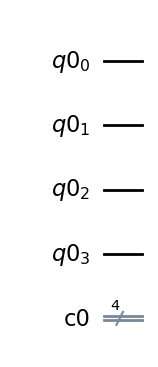

In [2]:
n0=4
q0 = QuantumRegister(n0)
c0 = ClassicalRegister(n0)
circuit0 = QuantumCircuit(q0, c0)
circuit0.draw(output='mpl')

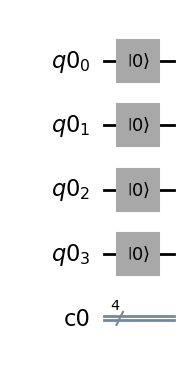

In [3]:
circuit0.reset([q0[0],q0[1],q0[2],q0[3]])
circuit0.draw(output='mpl')

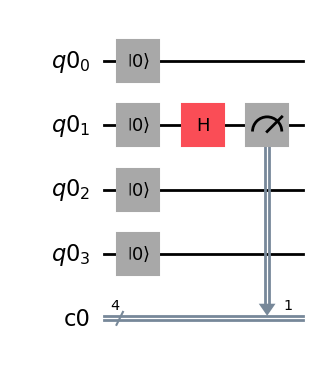

In [4]:
circuit0.h(q0[1])
circuit0.measure(q0[1],c0[1])
circuit0.draw(output='mpl')

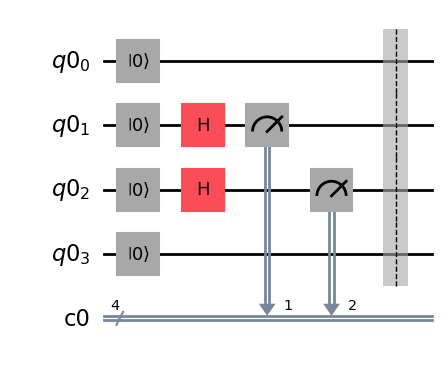

In [5]:
circuit0.h(q0[2])
circuit0.measure(q0[2],c0[2])
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])
circuit0.draw(output='mpl')

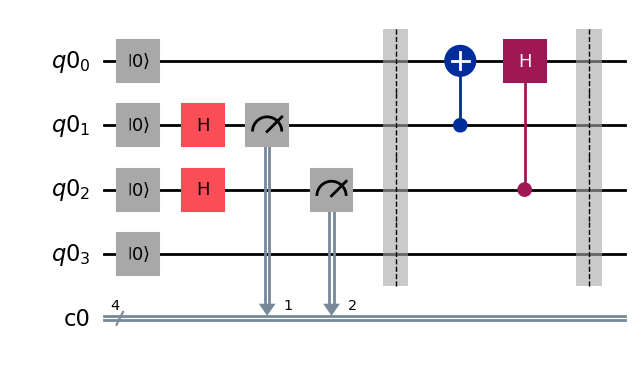

In [6]:
circuit0.cx(q0[1],q0[0])
circuit0.ch(q0[2],q0[0])
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])
circuit0.draw(output='mpl')

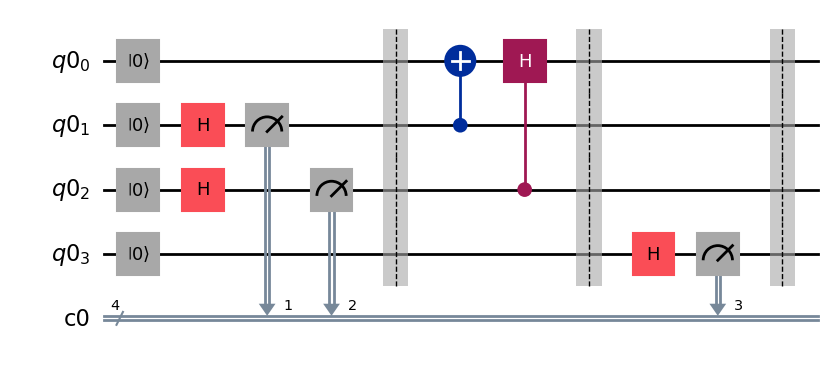

In [7]:
circuit0.h(q0[3])
circuit0.measure(q0[3],c0[3])
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])
circuit0.draw(output= 'mpl')

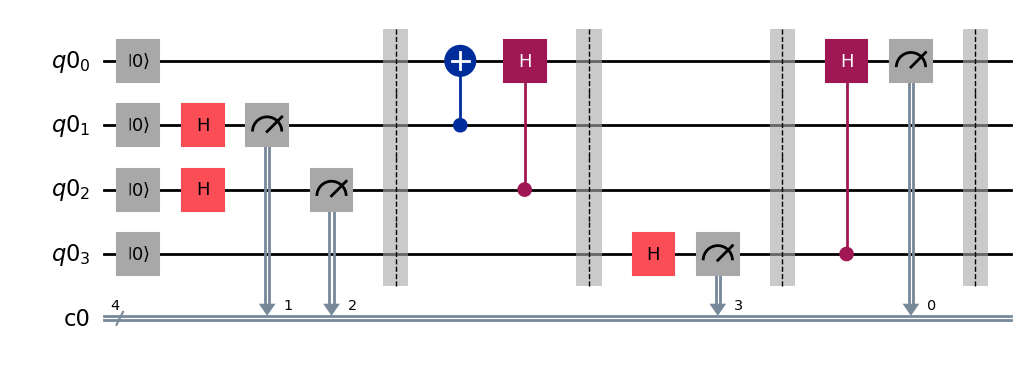

In [8]:
circuit0.ch(q0[3],q0[0])
circuit0.measure(q0[0], c0[0])
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])
circuit0.draw(output= 'mpl')

In [9]:
backend = Aer.get_backend('qasm_simulator')
compiled_circuitX = transpile(circuit0, backend)
job_sim0 = backend.run(compiled_circuitX, shots=1)
sim_result0 = job_sim0.result()
wynik=sim_result0.get_counts(circuit0)
print(wynik)

{'0011': 1}


In [10]:
sample=10
bit=[]
for kk in range(sample):
    compiled_circuitX = transpile(circuit0,
    backend)
    job_sim0 = backend.run(compiled_circuitX,
    shots=1)
    sim_result0 = job_sim0.result()
    wynik=sim_result0.get_counts(circuit0)
    xA=int(list(wynik.keys())[0][2])
    yA=int(list(wynik.keys())[0][1])
    yB=int(list(wynik.keys())[0][0])
    xB=int(list(wynik.keys())[0][3])
    print(wynik,"->",[xA,yA,yB,xB])
    bit.append([xA,yA,yB,xB])

{'0000': 1} -> [0, 0, 0, 0]
{'0100': 1} -> [0, 1, 0, 0]
{'1111': 1} -> [1, 1, 1, 1]
{'1000': 1} -> [0, 0, 1, 0]
{'1111': 1} -> [1, 1, 1, 1]
{'0011': 1} -> [1, 0, 0, 1]
{'0110': 1} -> [1, 1, 0, 0]
{'1111': 1} -> [1, 1, 1, 1]
{'1111': 1} -> [1, 1, 1, 1]
{'1001': 1} -> [0, 0, 1, 1]


In [11]:
kluczA=[]
kluczB=[]
for bb in bit:
    if bb[1]==bb[2]:
        kluczA.append(bb[0])
        kluczB.append(bb[3])
        print('yA=',bb[1], 'yB=',bb[2], '->','xA=',bb[0],',xB=',bb[3])
print('kluczA=',kluczA)
print('kluczB=',kluczB)
assert kluczA == kluczB

yA= 0 yB= 0 -> xA= 0 ,xB= 0
yA= 1 yB= 1 -> xA= 1 ,xB= 1
yA= 1 yB= 1 -> xA= 1 ,xB= 1
yA= 0 yB= 0 -> xA= 1 ,xB= 1
yA= 1 yB= 1 -> xA= 1 ,xB= 1
yA= 1 yB= 1 -> xA= 1 ,xB= 1
kluczA= [0, 1, 1, 1, 1, 1]
kluczB= [0, 1, 1, 1, 1, 1]


## Experiment

In [12]:
def construct_circuit():
    n0=4
    q0 = QuantumRegister(n0)
    c0 = ClassicalRegister(n0)
    exp_circuit = QuantumCircuit(q0, c0)
    exp_circuit.reset([q0[0],q0[1],q0[2],q0[3]])
    exp_circuit.h(q0[1])
    exp_circuit.measure(q0[1],c0[1])
    exp_circuit.h(q0[2])
    exp_circuit.measure(q0[2],c0[2])
    exp_circuit.barrier(q0[0], q0[1], q0[2], q0[3])
    exp_circuit.cx(q0[1],q0[0])
    exp_circuit.ch(q0[2],q0[0])
    exp_circuit.barrier(q0[0], q0[1], q0[2], q0[3])
    exp_circuit.h(q0[3])
    exp_circuit.measure(q0[3],c0[3])
    exp_circuit.barrier(q0[0], q0[1], q0[2], q0[3])
    exp_circuit.ch(q0[3],q0[0])
    exp_circuit.measure(q0[0], c0[0])
    exp_circuit.barrier(q0[0], q0[1], q0[2], q0[3])
    return exp_circuit

In [13]:
def run_experiment(n_samples, n_runs):
    full_experiment_table = {f"Results_Run_{i+1}": [] for i in range(n_runs)}
    full_experiment_table["Sample = n"] = [i for i in n_samples]

    for run in range(1, n_runs+1):
        for n_sample in n_samples:
            exp_circuit = construct_circuit()
            backend = Aer.get_backend('qasm_simulator')
            exp_compiled_circuit = transpile(exp_circuit, backend)

            job_sim = backend.run(exp_compiled_circuit, shots=1)
            sim_result = job_sim.result()
            result=sim_result.get_counts(exp_circuit)
            bit=[]
            
            for kk in range(n_sample):
                exp_compiled_circuit = transpile(exp_circuit, backend)
                job_sim0 = backend.run(exp_compiled_circuit, shots=1)
                sim_result0 = job_sim0.result()
                result=sim_result0.get_counts(exp_circuit)
                xA=int(list(result.keys())[0][2])
                yA=int(list(result.keys())[0][1])
                yB=int(list(result.keys())[0][0])
                xB=int(list(result.keys())[0][3])
                bit.append([xA,yA,yB,xB])
            
            keyA=[]
            keyB=[]
            
            for bb in bit:
                if bb[1]==bb[2]:
                    keyA.append(bb[0])
                    keyB.append(bb[3])
            
            assert keyA == keyB
            full_experiment_table[f"Results_Run_{run}"].append(len(keyA))
    
    full_experiment_df = pd.DataFrame(full_experiment_table)
    full_experiment_df.set_index('Sample = n')
    return full_experiment_df


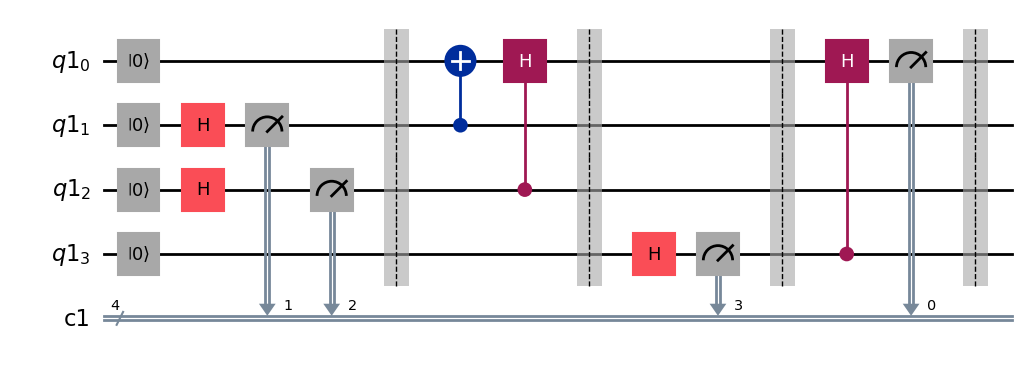

In [14]:
circuit0 = construct_circuit()
circuit0.draw(output= 'mpl')

In [15]:
run_experiment(n_samples = [16, 32, 64, 128, 256, 512, 1024], n_runs=5)

,Results_Run_1,Results_Run_2,Results_Run_3,Results_Run_4,Results_Run_5,Sample = n
0,10,10,7,7,11,16
1,17,17,10,15,20,32
2,34,33,28,30,34,64
3,62,64,73,65,55,128
4,129,143,132,134,122,256
5,253,259,265,262,250,512
6,506,513,507,492,512,1024


## Conclusions

The experimental results demonstrate that the BB84 protocol successfully generates matching encryption keys for the communicating parties (Alice and Bob). the resulting key length is observed to be approximately equal to half the number of transmitted bits (the bases match 50% of the time, as expected). The simulation confirms that when Alice and Bob use matching measurement bases (yA = yB), their bit values (xA and xB) are identical, allowing for the quantum key distribution algorithm to work. As the sample size increases, the protocol exhibits consistent performance with roughly 50% of transmissions yielding usable key bits, this seems to align with theoretical predictions. The experiment showcases exciting possibilities of quantum key sharing and quantum cryptography which might become possible as quantum computing develops further.